In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import pandas as pd

In [2]:
X_train = np.load('../data/processed/X_train.npy')
y_train = np.load('../data/processed/y_train.npy')
X_test = np.load('../data/processed/X_test.npy')
y_test = np.load('../data/processed/y_test.npy')

train_data = pd.read_csv('../data/raw/mnist_train.csv')
test_data = pd.read_csv('../data/raw/mnist_test.csv')

X_train = train_data.iloc[:, 1:].values / 255.0
y_train = train_data.iloc[:, 0].values

X_test = test_data.iloc[:, 1:].values / 255.0
y_test = test_data.iloc[:, 0].values

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [3]:
# Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.summary()

c:\Users\Dell\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=15,
                    batch_size=128,
                    callbacks=[early_stop])

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 88ms/step - accuracy: 0.8304 - loss: 0.5565 - val_accuracy: 0.9803 - val_loss: 0.0611
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.9764 - loss: 0.0773 - val_accuracy: 0.9872 - val_loss: 0.0422
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 84ms/step - accuracy: 0.9826 - loss: 0.0546 - val_accuracy: 0.9895 - val_loss: 0.0303
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.9867 - loss: 0.0423 - val_accuracy: 0.9892 - val_loss: 0.0316
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.9890 - loss: 0.0367 - val_accuracy: 0.9903 - val_loss: 0.0265
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/step - accuracy: 0.9904 - loss: 0.0287 - val_accuracy: 0.9905 - val_loss: 0.0258
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9919 - loss: 0.0262 - val_accuracy: 0.9915 - val_loss: 0.0251
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9923 - loss: 0.0228 - 

In [5]:
# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_acc:.4f}")

✅ Test Accuracy: 0.9915


In [6]:
# Save Model
model.save('../model/cnn_model.h5')
print("✅ CNN Model saved at: ../model/cnn_model.h5")

✅ CNN Model saved at: ../model/cnn_model.h5


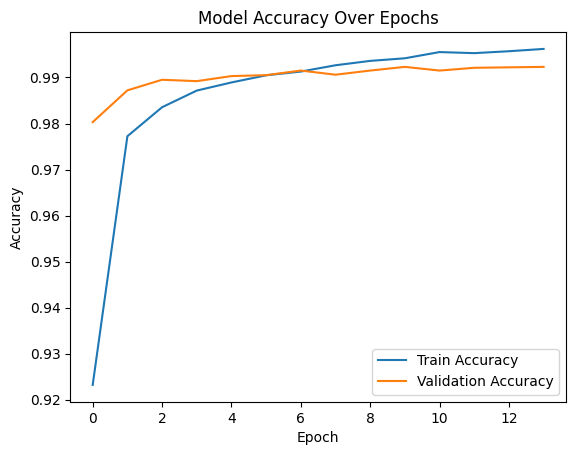

In [7]:
# Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('../reports/model_accuracy.png')
plt.show()
